<a href="https://colab.research.google.com/github/jodogwu/Projects-Machine/blob/main/MSC_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MSC HOUSING PROJECT**

In [ ]:
# Import libraries

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

### **Loading Dataset to DataFrame**

In [ ]:
# load dataset into a DataFrame

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df_train = pd.read_csv('/content/drive/My Drive/msc_training_dataset.csv')
df_test = pd.read_csv('/content/drive/My Drive/msc_testing_dataset.csv')

Mounted at /content/drive


In [ ]:
# Display the top rows of a pandas DataFrame
df_train.head()


,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
df_test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [ ]:
# Describe the data types of each variable
# Print the data types of each variable
print(df_train.dtypes)

room            int64
bathroom        int64
kitchen         int64
french_door     int64
backyard        int64
furnished       int64
green_paint     int64
solar_power     int64
woodfloor       int64
qlm_security    int64
club_access     int64
price           int64
dtype: object


In [ ]:
print(df_test.dtypes)

room            int64
bathroom        int64
kitchen         int64
french_door     int64
backyard        int64
furnished       int64
green_paint     int64
solar_power     int64
woodfloor       int64
qlm_security    int64
club_access     int64
price           int64
dtype: object


In [ ]:
# Check For Unique Values in Data
df_train.apply(lambda x: len(x.unique()))

room              5
bathroom          2
kitchen           2
french_door       3
backyard          2
furnished         2
green_paint       2
solar_power       2
woodfloor         2
qlm_security      2
club_access       2
price           856
dtype: int64

In [ ]:
df_test.apply(lambda x: len(x.unique()))

room              5
bathroom          2
kitchen           2
french_door       3
backyard          2
furnished         2
green_paint       2
solar_power       2
woodfloor         2
qlm_security      2
club_access       2
price           561
dtype: int64

In [ ]:
# print the dimensions of the dataset
print('Number of rows: ', df_train.shape[0])
print('Number of columns: ', df_train.shape[1])

Number of rows:  3000
Number of columns:  12


In [ ]:
print('Number of rows: ', df_test.shape[0])
print('Number of columns: ', df_test.shape[1])

Number of rows:  999
Number of columns:  12


In [ ]:
# use describe() method to get descriptive statistics of the DataFrame
df_train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [ ]:
# use describe() method to get descriptive statistics of the DataFrame
df_test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000




## **Data Preprocessing**

In [ ]:
# Data Cleaning
# Check for missing values
print(df_train.isnull().sum())

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64


In [ ]:
print(df_test.isnull().sum())

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64


## **Explanatory Data Analysis**

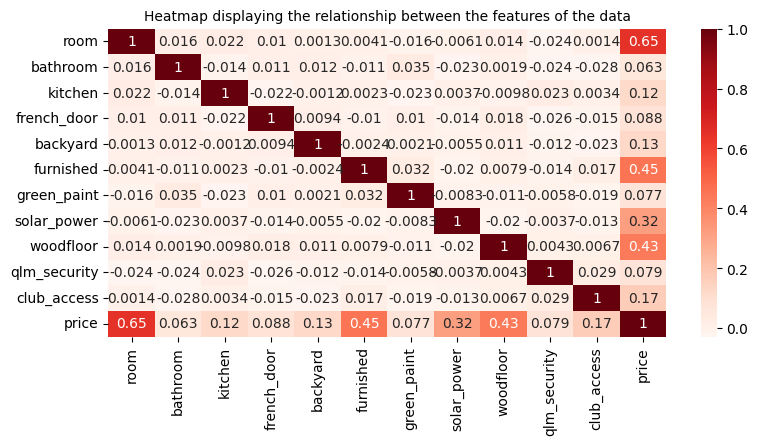

In [ ]:
# Heatmap Correlation for the Train data
# Dark color represents a positive correlation,
# Light color/ white is  towards the negative correlation.
plt.figure(figsize=(9,4))
sns.heatmap(df_train.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=10)
plt.show()

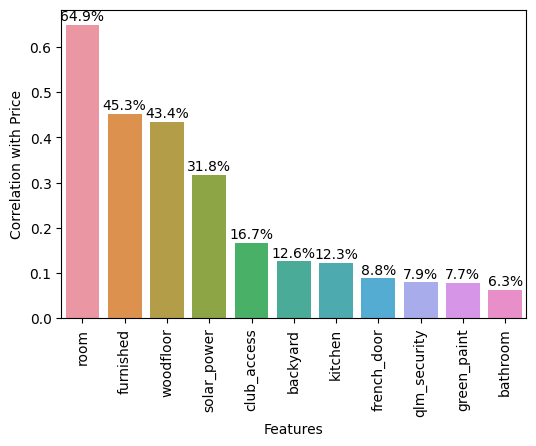

In [ ]:
# Calculate the correlation coefficients between the features and the target variable "price"
corr_with_price = df_train.corr()["price"].sort_values(ascending=False)[1:]

# Create a bar plot to visualize the correlation coefficients
plt.figure(figsize=(6,4))
ax = sns.barplot(x=corr_with_price.index, y=corr_with_price.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with Price")

# Add annotations to the bar plot to show the correlation coefficients as percentages
for i, v in enumerate(corr_with_price.values):
    ax.text(i, v+0.01, f"{v*100:.1f}%", ha="center")

plt.show()

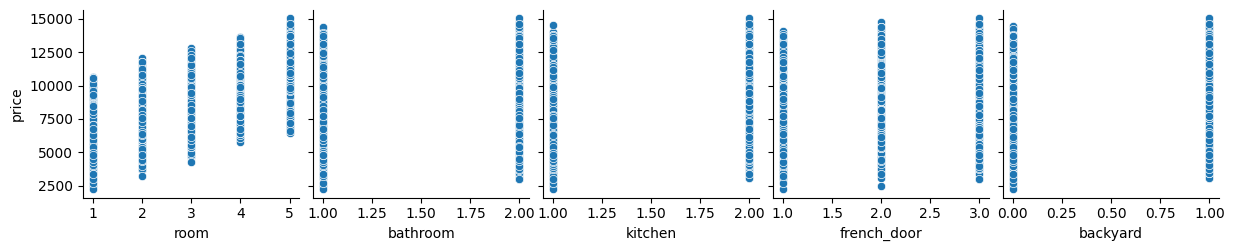

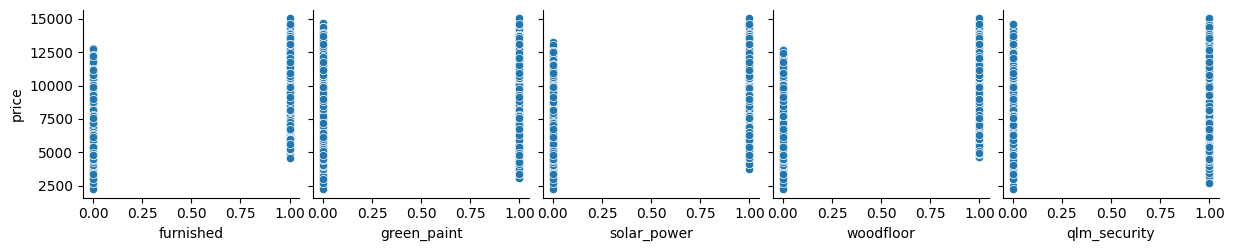

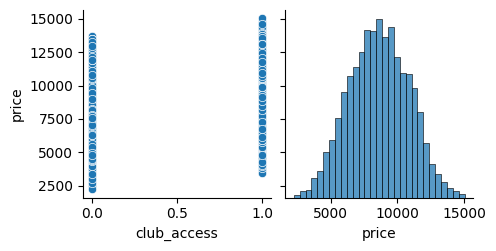

In [ ]:
for i in range(0, len(df_train.columns), 5):
    sns.pairplot(data=df_train,
                x_vars=df_train.columns[i:i+5],
                y_vars=['price'])


### **Box Plot Analysis**

<Axes: >

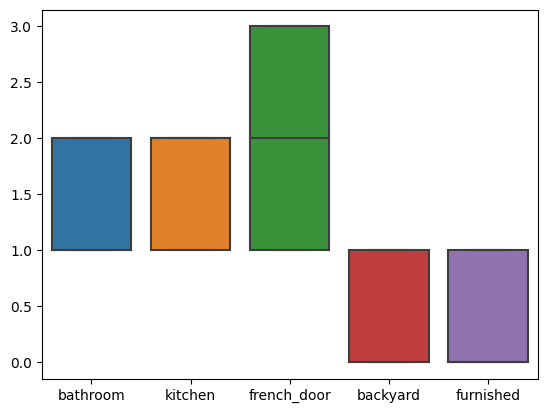

In [ ]:
# Box Plot Analysis
columns = ['bathroom', 'kitchen', 'french_door', 'backyard', 'furnished']
sns.boxplot(data=df_train[columns])


<Axes: >

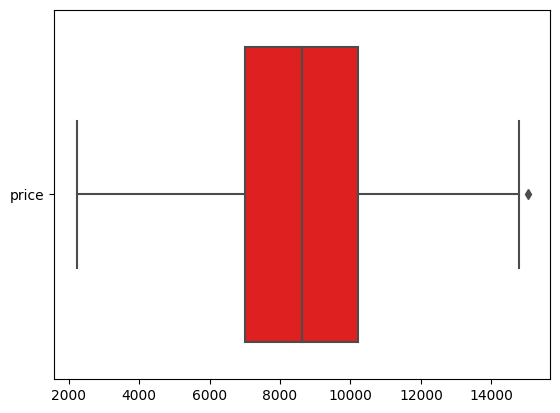

In [ ]:
# Box Plot Analysis for Numerical Categories
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_train[["price"]], orient="h", color="red")

<Axes: >

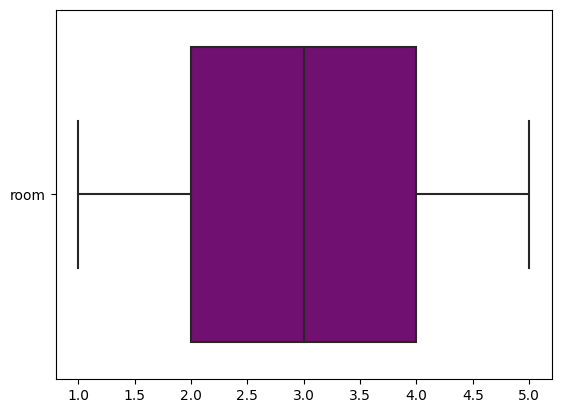

In [ ]:
# Box Plot Analysis for Numerical Categories

sns.boxplot(data=df_train[["room"]], orient="h", color="purple")

<Axes: >

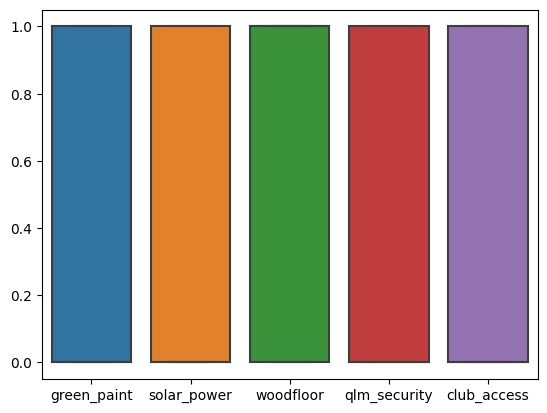

In [ ]:
columns = ['green_paint', 'solar_power', 'woodfloor', 'qlm_security', 'club_access']
sns.boxplot(data=df_train[columns])



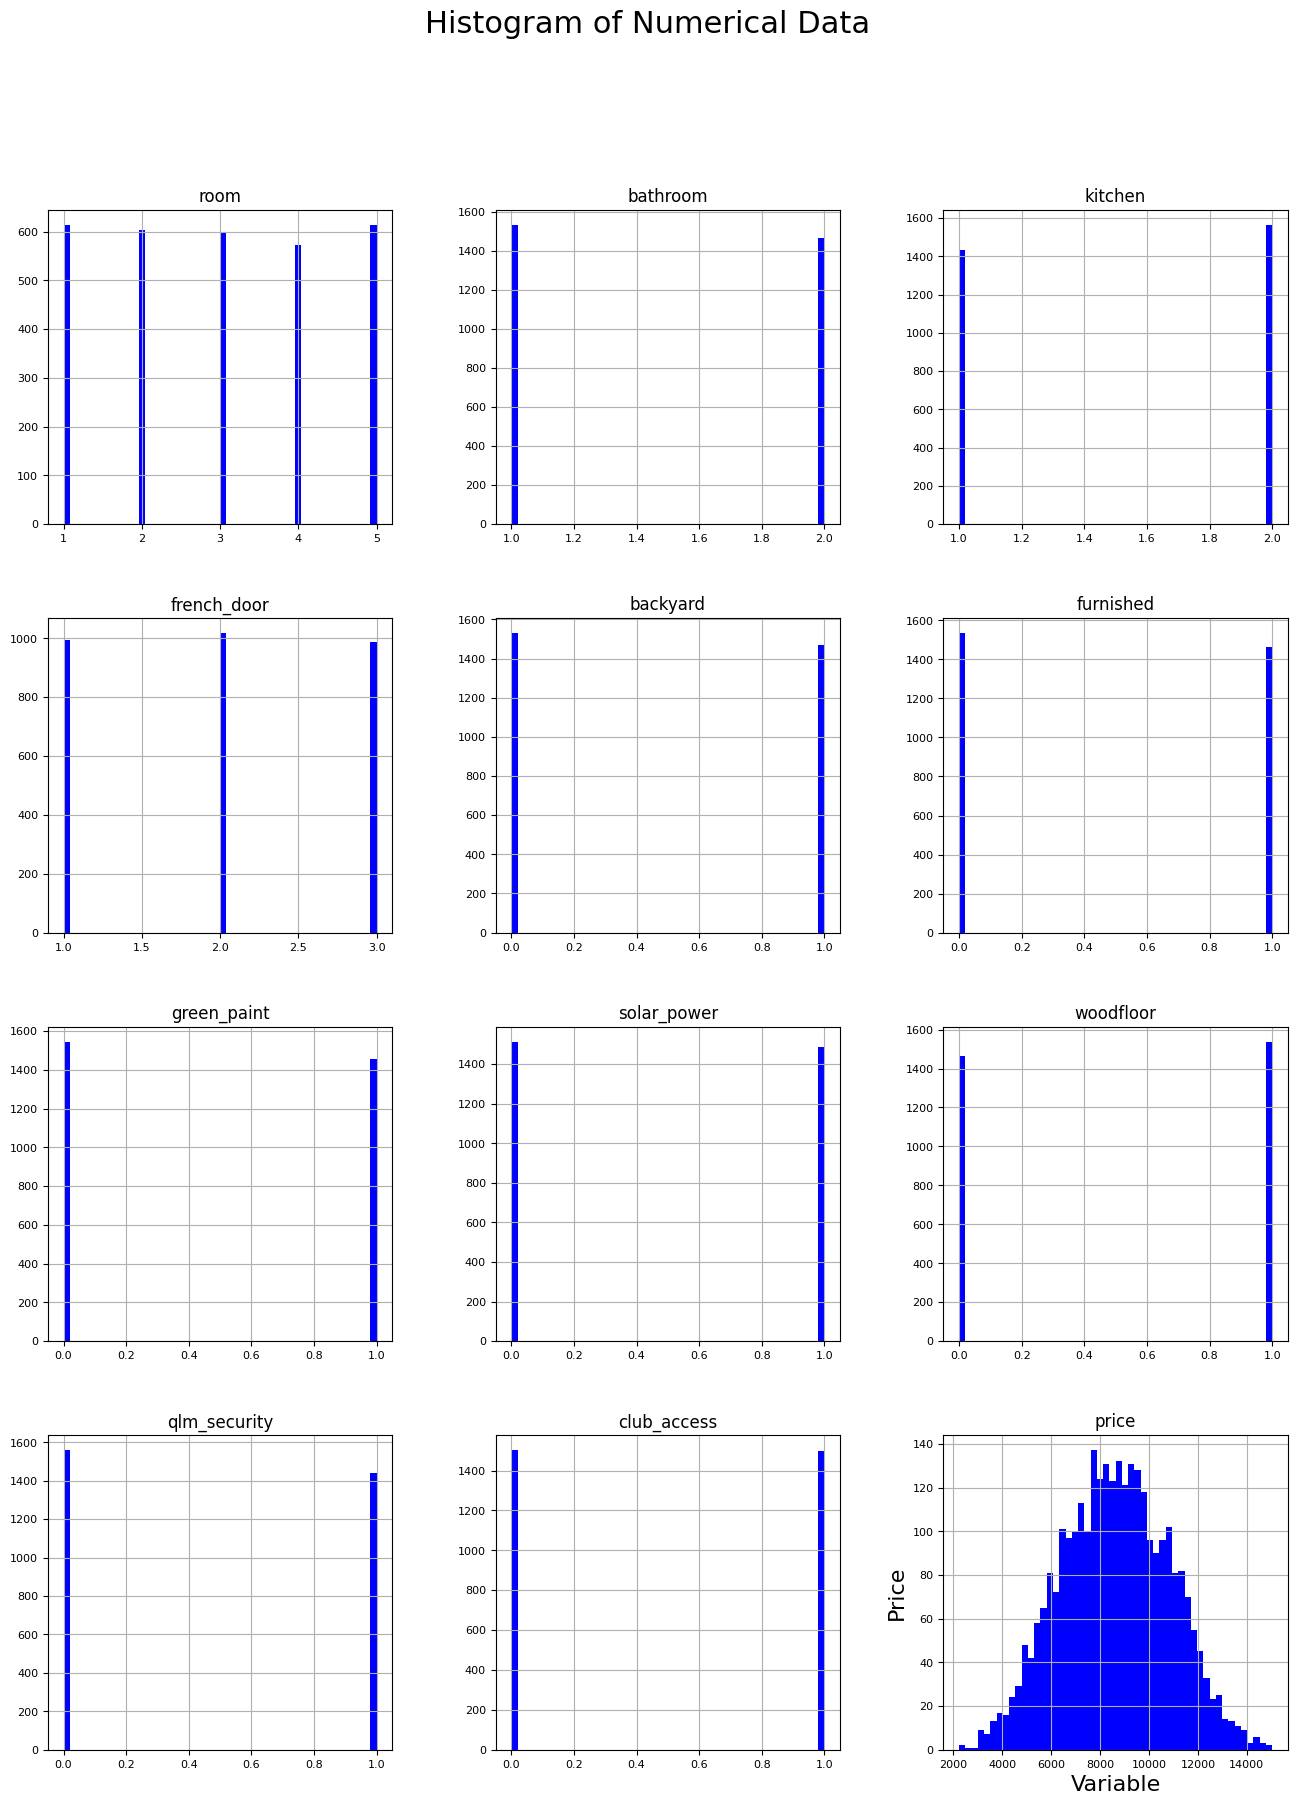

In [ ]:
# plot histogram of Numerical Columns and Variables
colors = ['blue']
# specify colors for each column
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color=colors)

# add title and axis labels
plt.suptitle('Histogram of Numerical Data', fontsize=22)
plt.xlabel('Variable', fontsize=16)
plt.ylabel('Price', fontsize=16)

# display plot
plt.show()

### **Preprocessing Task before Model Building**

**Separating the features and the target variable (Price)**

In [ ]:
# Separate the features and the target variable (Total Sales)
X_train = df_train.drop(['price'], axis=1)
Y_train= df_train['price']
X_test = df_test.drop(['price'], axis=1)
Y_test= df_test['price']

In [ ]:
# Check the shape of X and Y
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train", Y_train.shape)

Shape of X_train: (3000, 11)
Shape of Y_train (3000,)


In [ ]:
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test", Y_test.shape)

Shape of X_test: (999, 11)
Shape of Y_test (999,)


### **Model Building**

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [ ]:
Y_pred_lr=lr.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
lr_r2 = r2_score(Y_test,Y_pred_lr)
lr_mae = mean_absolute_error(Y_test,Y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(Y_test,Y_pred_lr))

print("R2 Score:", lr_r2)
print("Mean Absolute Error:", lr_mae)
print("Mean Square Error:", lr_rmse)


R2 Score: 0.9999656095212318
Mean Absolute Error: 13.000000000000469
Mean Square Error: 13.000000000000467


In [ ]:
# Extract the feature coefficients
coefficients = pd.Series(lr.coef_, index=X_train.columns).sort_values()
print(coefficients)

french_door      240.0
bathroom         300.0
green_paint      370.0
qlm_security     440.0
kitchen          500.0
backyard         560.0
club_access      730.0
room            1000.0
solar_power     1530.0
woodfloor       1890.0
furnished       2000.0
dtype: float64


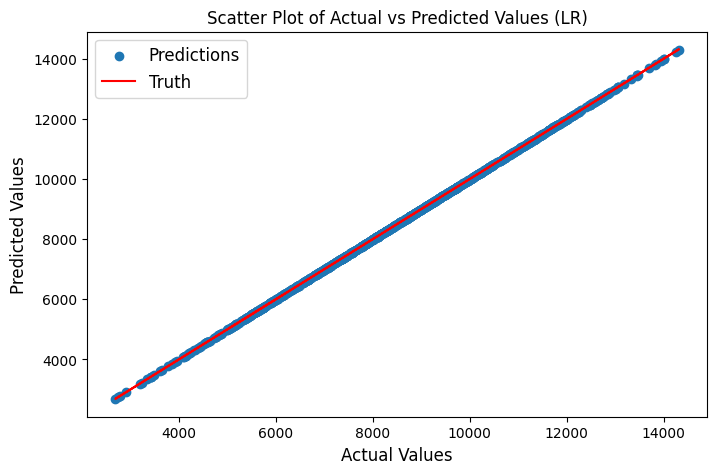

In [ ]:
# combined plots -Visualising Predictions

# plot actual vs predicted values
fig = plt.figure(figsize=(8,5))
plt.scatter(Y_test,Y_pred_lr, label='Predictions')
plt.plot(Y_test,Y_test,'r', label='Truth')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Scatter Plot of Actual vs Predicted Values (LR)', fontsize=12)
plt.legend(fontsize=12)
plt.show()

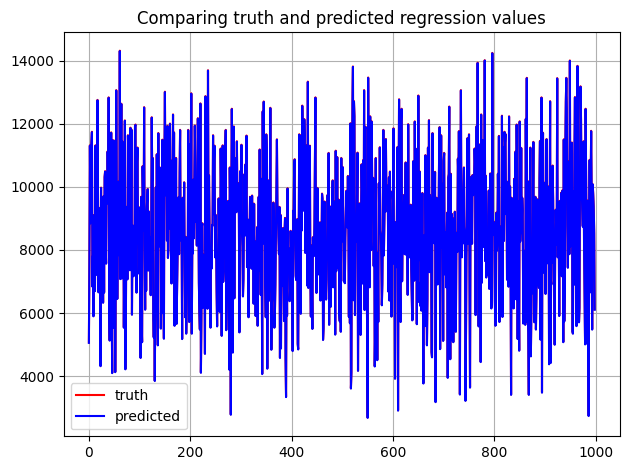

In [ ]:
make_plot(Y_test, Y_pred_lr)

<Axes: xlabel='price', ylabel='Density'>

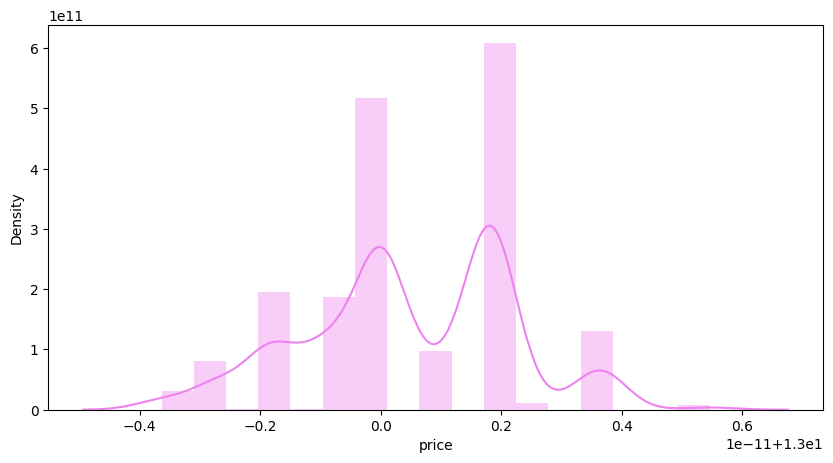

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (Y_test- Y_pred_lr)
sns.distplot(residuals, color='violet')

### **Prediction of House Prices Using the Test data (Linear Regression)**

In [ ]:
# Provide the estimated Price values in a suitable format
test_results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_lr})
print('Test Results (Linear Regression):')
print(test_results)

Test Results (Linear Regression):
     Actual  Predicted
0      5068     5055.0
1      7658     7645.0
2     11318    11305.0
3      8858     8845.0
4     11178    11165.0
..      ...        ...
994   10088    10075.0
995    9788     9775.0
996    9388     9375.0
997    8528     8515.0
998    6118     6105.0

[999 rows x 2 columns]


In [ ]:
# Provide the estimated Price values in a suitable format including % Error
test_results['% Error'] = abs(test_results['Actual'] - test_results['Predicted']) / test_results['Actual'] * 100
print('Test Results (Linear Regression):')
print(test_results)

Test Results (Linear Regression):
     Actual  Predicted   % Error
0      5068     5055.0  0.256511
1      7658     7645.0  0.169757
2     11318    11305.0  0.114861
3      8858     8845.0  0.146760
4     11178    11165.0  0.116300
..      ...        ...       ...
994   10088    10075.0  0.128866
995    9788     9775.0  0.132816
996    9388     9375.0  0.138475
997    8528     8515.0  0.152439
998    6118     6105.0  0.212488

[999 rows x 3 columns]


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [ ]:
rf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
Y_pred_rf= rf.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(Y_test, Y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred_rf))
print("Mean Square Error:", np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))

R2 Score: 0.9897362245474997
Mean Absolute Error: 169.90266266266266
Mean Square Error: 224.5834827491188


### **Obtain Importance Features and Plot**

In [ ]:
# compute feature importances as percentages
importances = pd.Series(rf.feature_importances_ * 100, index=X_train.columns).round(2)

# print feature importances in descending order
print(importances.sort_values(ascending=False).apply(lambda x: str(round(x,2)) + '%'))


room            42.99%
furnished       19.82%
woodfloor       17.66%
solar_power     11.43%
club_access       2.6%
backyard         1.46%
kitchen          1.12%
french_door      0.89%
qlm_security     0.89%
green_paint      0.68%
bathroom         0.47%
dtype: object


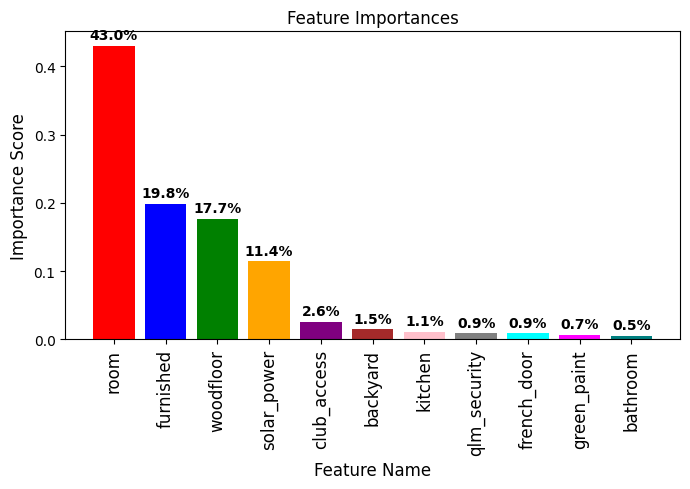

In [ ]:

import matplotlib.pyplot as plt

# calculate feature importances and create a pandas Series object
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# sort importances in descending order
importances = importances.sort_values(ascending=False)

# create a vertical bar plot of feature importances
fig, ax = plt.subplots(figsize=(7, 5))  # set figure size
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'teal']
ax.bar(importances.index, importances, color=colors)  # plot vertical bars
ax.set_xticklabels(importances.index, rotation=90, fontsize=12)  # rotate x-axis labels
ax.set_xlabel('Feature Name', fontsize=12)
ax.set_ylabel('Importance Score', fontsize=12)
ax.set_title('Feature Importances', fontsize=12)

# display percentage values above the bars
for i, v in enumerate(importances):
    ax.text(i, v + 0.01, '{:.1f}%'.format(v*100), ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()




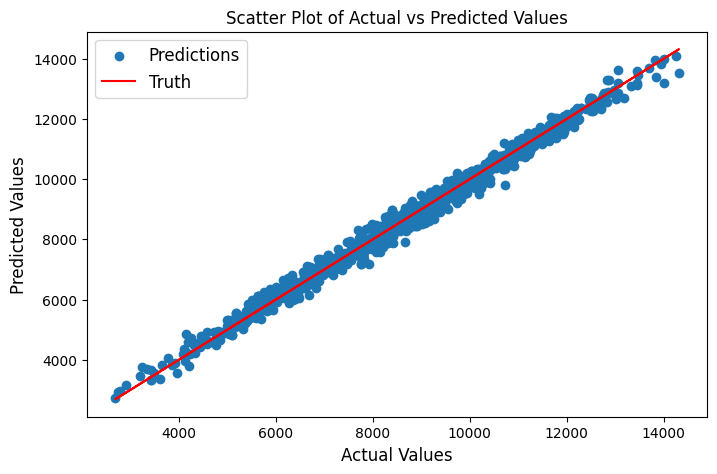

In [ ]:
# combined plots -Visualising Predictions

# plot actual vs predicted values
fig = plt.figure(figsize=(8,5))
plt.scatter(Y_test,Y_pred_rf, label='Predictions')
plt.plot(Y_test,Y_test,'r', label='Truth')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Scatter Plot of Actual vs Predicted Values', fontsize=12)
plt.legend(fontsize=12)
plt.show()

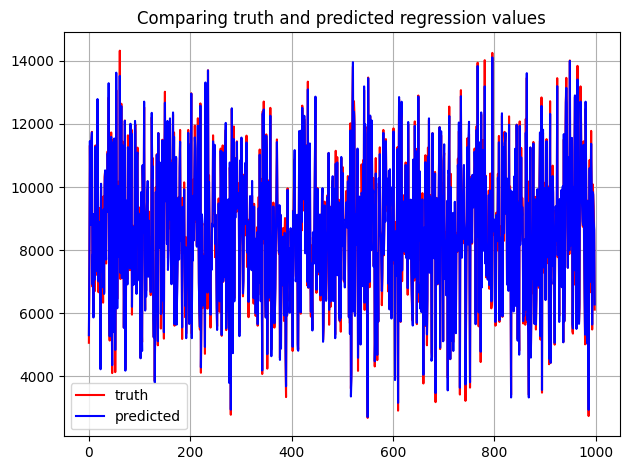

In [ ]:
make_plot(Y_test, Y_pred_rf)

<Axes: xlabel='price', ylabel='Density'>

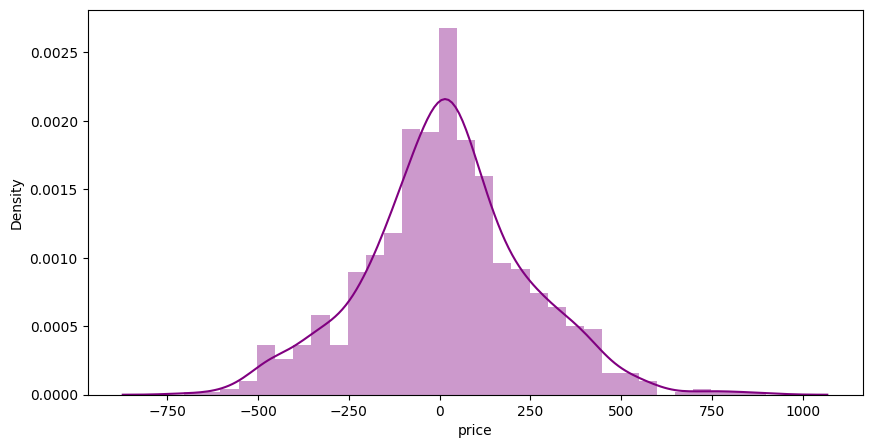

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (Y_test- Y_pred_rf)
sns.distplot(residuals, color='purple')

### **Prediction of House Price Using Test Data (Random Forest)**

In [ ]:
# Provide the estimated Price values in a suitable format
test_results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_rf})
print('Test Results (Random Forest):')
print(test_results)

Test Results (Random Forest):
     Actual  Predicted
0      5068    5307.58
1      7658    7717.05
2     11318   11456.26
3      8858    8796.75
4     11178   11091.48
..      ...        ...
994   10088    9844.18
995    9788    9763.16
996    9388    8923.30
997    8528    8626.12
998    6118    6282.60

[999 rows x 2 columns]


In [ ]:
# Provide the estimated Price values in a suitable format including % Error
test_results['% Error'] = abs(test_results['Actual'] - test_results['Predicted']) / test_results['Actual'] * 100
print('Test Results (Random Forest):')
print(test_results)


Test Results (Random Forest):
     Actual  Predicted   % Error
0      5068    5307.58  4.727309
1      7658    7717.05  0.771089
2     11318   11456.26  1.221594
3      8858    8796.75  0.691465
4     11178   11091.48  0.774020
..      ...        ...       ...
994   10088    9844.18  2.416931
995    9788    9763.16  0.253780
996    9388    8923.30  4.949936
997    8528    8626.12  1.150563
998    6118    6282.60  2.690422

[999 rows x 3 columns]
